In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

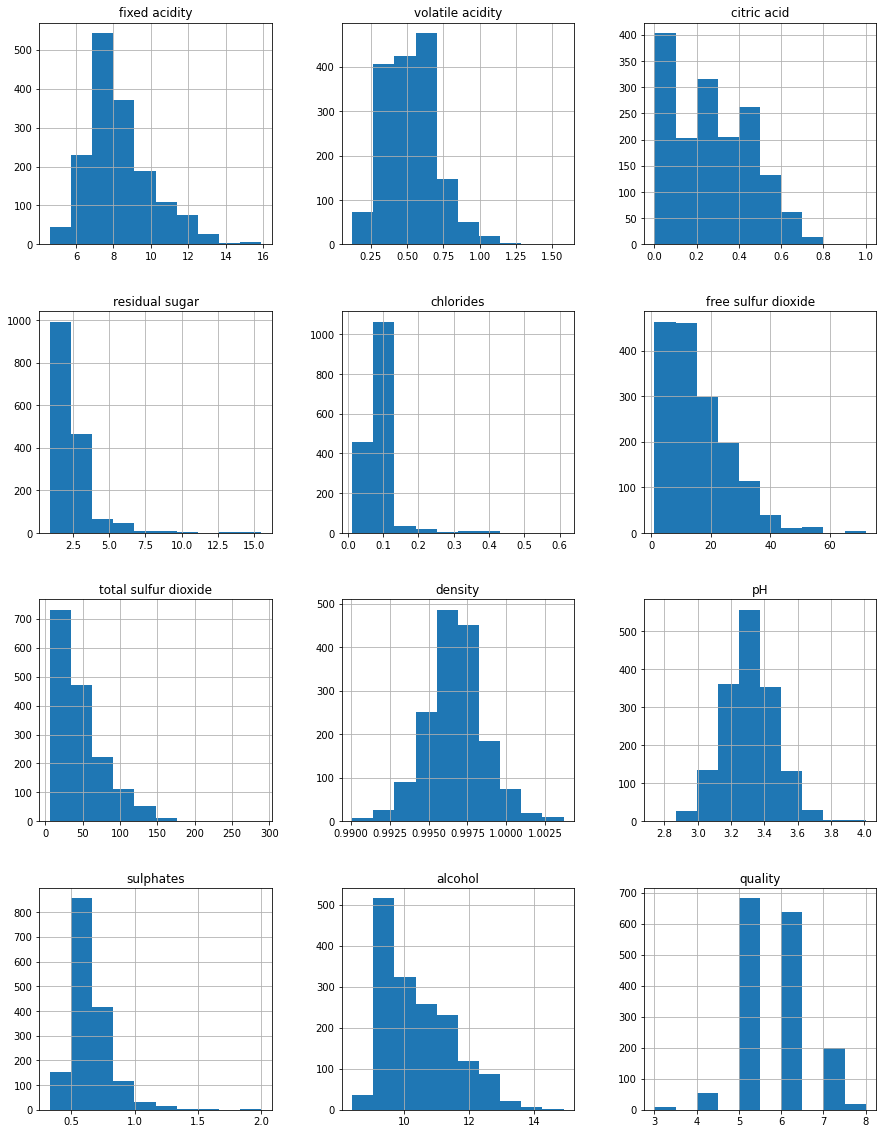

In [2]:
data = pd.read_csv('winequality-red.csv')
data.hist(figsize=(15, 20))


<AxesSubplot:>

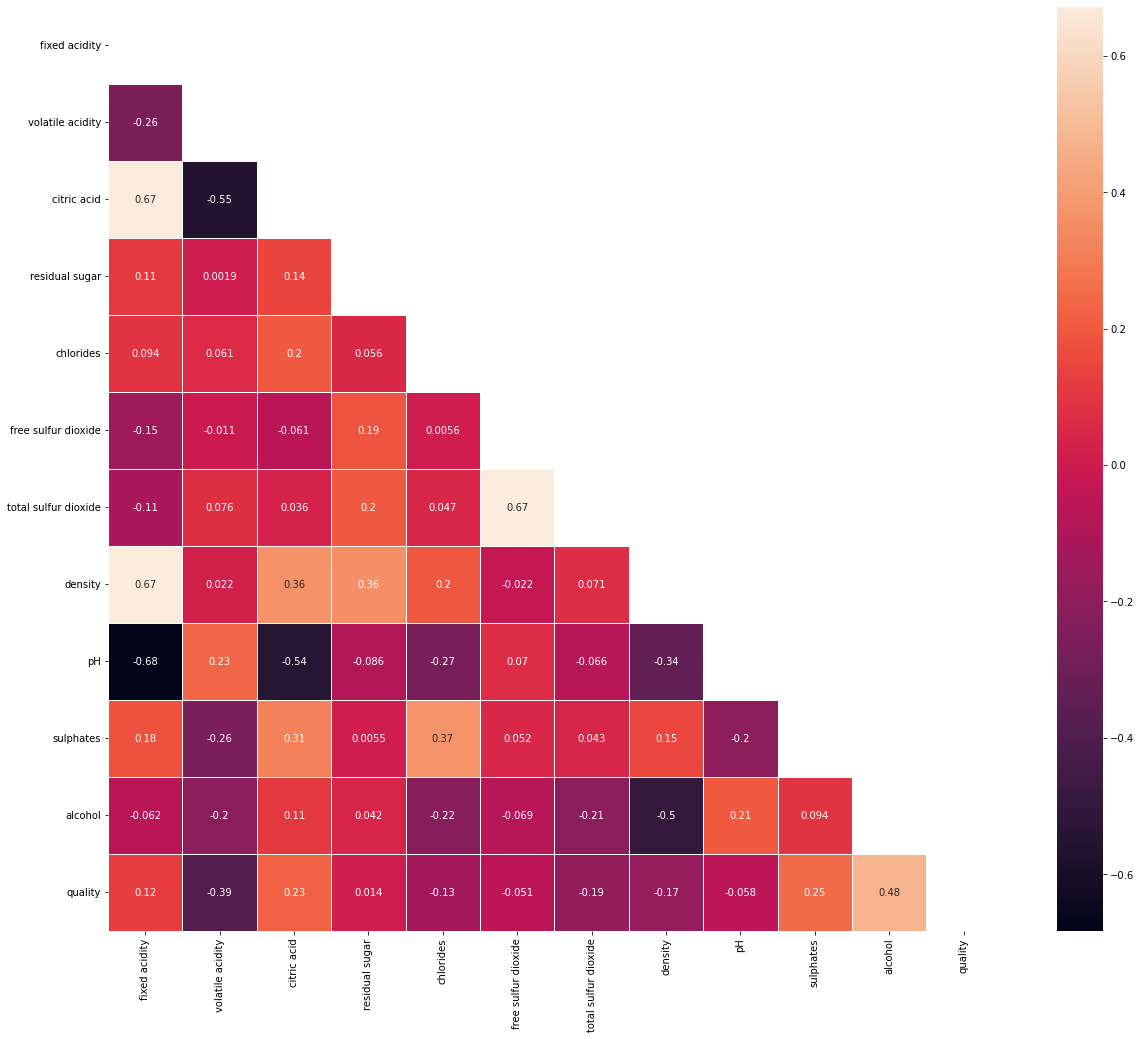

In [3]:
plt.figure(figsize=(20, 17))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket")


In [4]:
good, not_good = 1, 0
data['quality'] = np.where(data['quality'] > 6, good, not_good) 
data = data.sort_values(by='quality', ascending=False)
data['quality'].value_counts()

X = data.iloc[:, :-1]
y = data.iloc[:, -1]


X = (X - X.mean()) / X.std()

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1071, 11), (528, 11), (1071,), (528,))

In [5]:
knn = KNeighborsClassifier()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [6]:
parameters = {
    'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
    'leaf_size': [10, 30, 60, 100, 150, 200, 300],
    'metric': ['minkowski'],
    'n_jobs': [-1],
    'n_neighbors': [1, 2, 3, 5, 10, 15, 30],
    'p': [1, 2],
    'weights': ('uniform', 'distance')
}

clf = GridSearchCV(knn, parameters)
clf.fit(x_train, y_train)
clf.best_params_


{'algorithm': 'auto',
 'leaf_size': 10,
 'metric': 'minkowski',
 'n_jobs': -1,
 'n_neighbors': 30,
 'p': 2,
 'weights': 'distance'}

In [7]:
print(classification_report(y_test, clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       460
           1       0.71      0.47      0.57        68

    accuracy                           0.91       528
   macro avg       0.82      0.72      0.76       528
weighted avg       0.90      0.91      0.90       528

